In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
df1=pd.read_csv('/kaggle/input/google-merchandise-sales-data/events1.csv')
df1.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


In [23]:
df2=pd.read_csv('/kaggle/input/google-merchandise-sales-data/items.csv')
df2.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [24]:
df3=pd.read_csv('/kaggle/input/google-merchandise-sales-data/users.csv')
df3.head()

,id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38


In [25]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id',
       'date'],
      dtype='object')
Index(['id', 'name', 'brand', 'variant', 'category', 'price_in_usd'], dtype='object')
Index(['id', 'ltv', 'date'], dtype='object')


In [26]:
import pandas as pd

# Load the CSV files into pandas DataFrames
df1 = pd.read_csv('/kaggle/input/google-merchandise-sales-data/events1.csv')
df2 = pd.read_csv('/kaggle/input/google-merchandise-sales-data/items.csv')
df3 = pd.read_csv('/kaggle/input/google-merchandise-sales-data/users.csv')

# Rename 'item_id' in df1 to 'id' for merging with df2
df1.rename(columns={'item_id': 'id'}, inplace=True)

# Merge df1 and df2 on the 'id' column
merged_df = pd.merge(df1, df2, on='id', how='inner')

# Merge the result with df3 on 'user_id' from df1 and 'id' from df3
final_merged_df = pd.merge(merged_df, df3, left_on='user_id', right_on='id', how='inner')

# Display the first few rows of the final merged DataFrame
print(final_merged_df.head())

   user_id  ga_session_id country   device         type  id_x  \
0     2133          16909      US   mobile     purchase    94   
1     2133          16909      US   mobile     purchase   425   
2     5789          16908      SE  desktop     purchase     1   
3     5789          16908      SE  desktop     purchase    62   
4     5808           4267      US   mobile  add_to_cart   842   

                date_x                               name   brand  \
0  2020-11-01 00:27:14            Google Large Tote White  Google   
1  2020-11-01 00:27:14  Google Heather Green Speckled Tee  Google   
2  2020-11-01 01:44:44                     Google KeepCup  Google   
3  2020-11-01 01:44:44              Google Mini Kick Ball  Google   
4  2020-11-01 03:06:29     Google Infant Hero Onesie Grey  Google   

              variant category  price_in_usd  id_y  ltv               date_y  
0  Single Option Only     Bags            10  2133   34  2020-11-01 00:09:55  
1                  XL  Apparel      

In [27]:
# Rename columns for clarity
final_merged_df.rename(columns={'id_x': 'id', 'date_x': 'event_date', 'date_y': 'user_date'}, inplace=True)

# Drop duplicate 'id_y' column (since 'id' now refers to 'id_x')
final_merged_df.drop(columns=['id_y'], inplace=True)

# Display the cleaned DataFrame
print(final_merged_df.head())

   user_id  ga_session_id country   device         type   id  \
0     2133          16909      US   mobile     purchase   94   
1     2133          16909      US   mobile     purchase  425   
2     5789          16908      SE  desktop     purchase    1   
3     5789          16908      SE  desktop     purchase   62   
4     5808           4267      US   mobile  add_to_cart  842   

            event_date                               name   brand  \
0  2020-11-01 00:27:14            Google Large Tote White  Google   
1  2020-11-01 00:27:14  Google Heather Green Speckled Tee  Google   
2  2020-11-01 01:44:44                     Google KeepCup  Google   
3  2020-11-01 01:44:44              Google Mini Kick Ball  Google   
4  2020-11-01 03:06:29     Google Infant Hero Onesie Grey  Google   

              variant category  price_in_usd  ltv            user_date  
0  Single Option Only     Bags            10   34  2020-11-01 00:09:55  
1                  XL  Apparel            21   34  202

In [28]:
final_merged_df.head()

,user_id,ga_session_id,country,device,type,id,event_date,name,brand,variant,category,price_in_usd,ltv,user_date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Single Option Only,Bags,10,34,2020-11-01 00:09:55
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,XL,Apparel,21,34,2020-11-01 00:09:55
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,Single Option Only,New,28,72,2020-10-14 00:26:03
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Single Option Only,Fun,2,72,2020-10-14 00:26:03
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25,0,2020-08-18 03:44:52


In [29]:
df=final_merged_df

In [30]:
df.shape

(758884, 14)

In [31]:
shape = df.shape
print('The number of lines presented in this dataset are {}'.format(shape[0]))
print('The number of columns presented in this dataset are {}'.format(shape[1]))

The number of lines presented in this dataset are 758884
The number of columns presented in this dataset are 14


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        758884 non-null  int64 
 1   ga_session_id  758884 non-null  int64 
 2   country        754329 non-null  object
 3   device         758884 non-null  object
 4   type           758884 non-null  object
 5   id             758884 non-null  int64 
 6   event_date     758884 non-null  object
 7   name           758884 non-null  object
 8   brand          758884 non-null  object
 9   variant        122624 non-null  object
 10  category       758884 non-null  object
 11  price_in_usd   758884 non-null  int64 
 12  ltv            758884 non-null  int64 
 13  user_date      758884 non-null  object
dtypes: int64(5), object(9)
memory usage: 81.1+ MB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,758884.0,29541.809665,55129.337846,1.0,8401.0,17181.0,25809.0,270145.0
ga_session_id,758884.0,3632.325492,3952.875337,0.0,625.0,2103.0,5365.0,18033.0
id,758884.0,885.629356,289.267126,0.0,913.0,972.0,1040.0,1380.0
price_in_usd,758884.0,24.759137,20.892459,1.0,11.0,22.0,30.0,313.0
ltv,758884.0,61.428210,124.049917,0.0,0.0,0.0,80.0,1530.0


<Axes: >

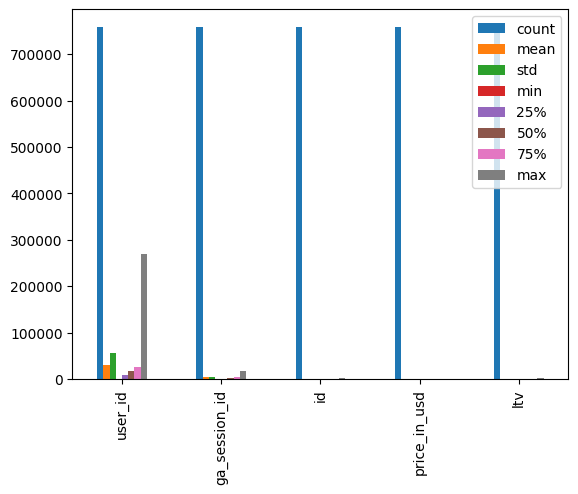

In [34]:
df.describe().T.plot(kind='bar')

In [35]:
df.columns.tolist()

['user_id',
 'ga_session_id',
 'country',
 'device',
 'type',
 'id',
 'event_date',
 'name',
 'brand',
 'variant',
 'category',
 'price_in_usd',
 'ltv',
 'user_date']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


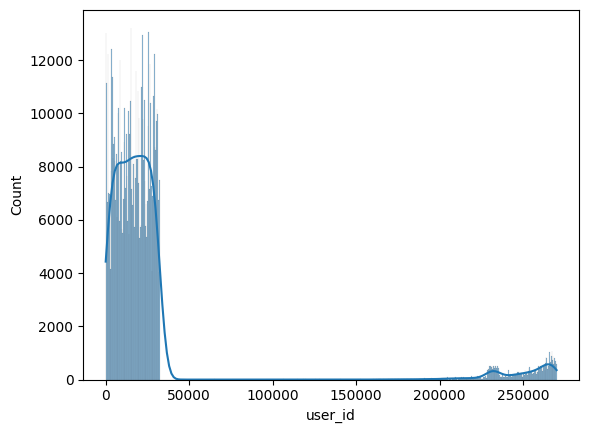

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


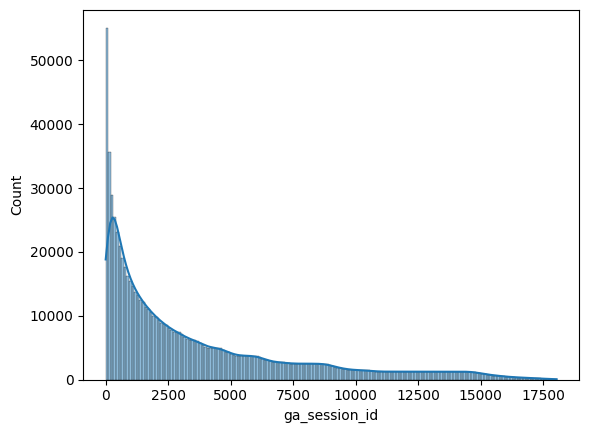

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


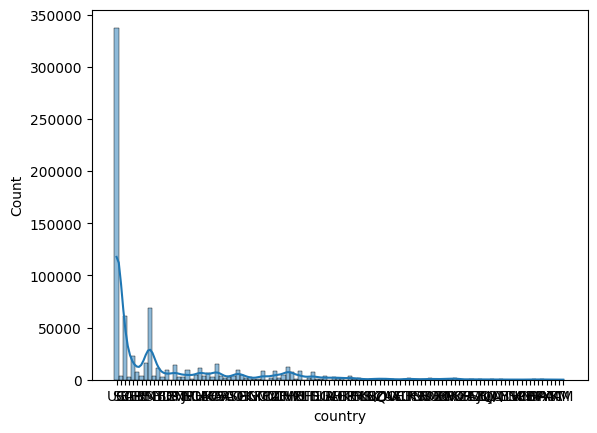

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


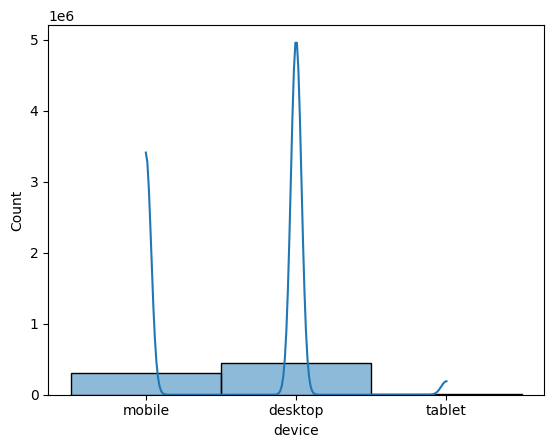

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


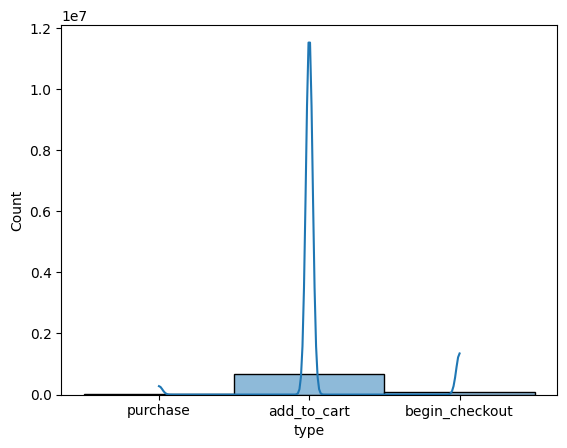

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


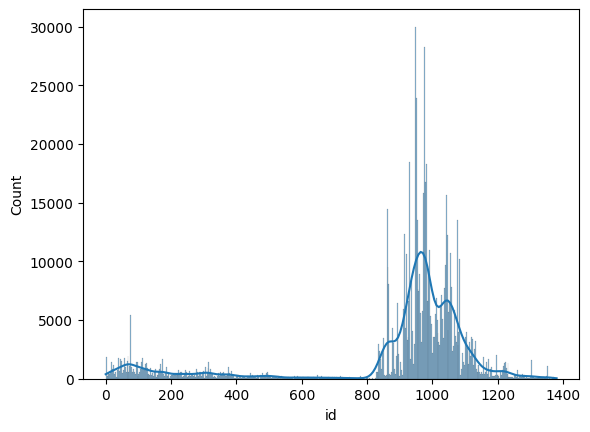

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


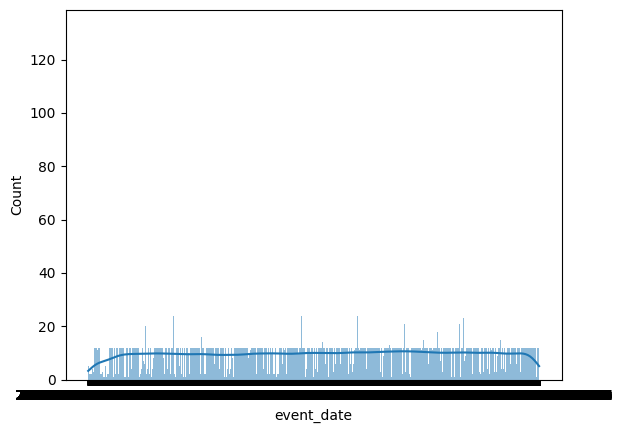

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


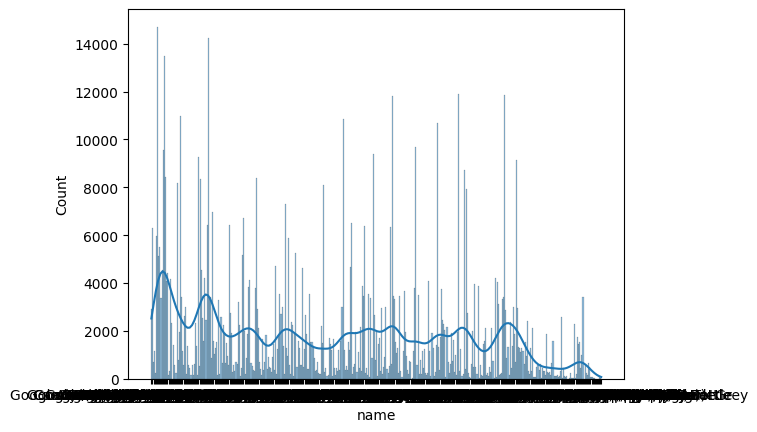

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


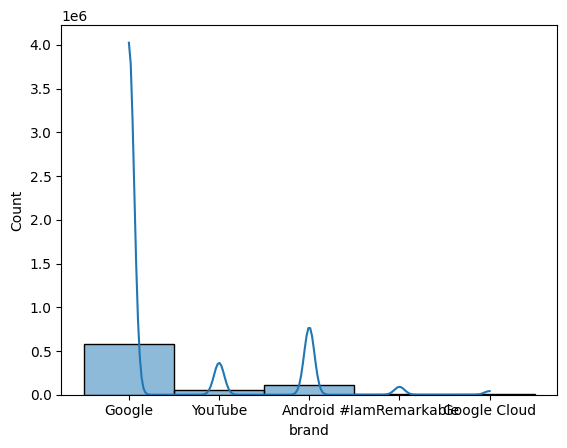

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


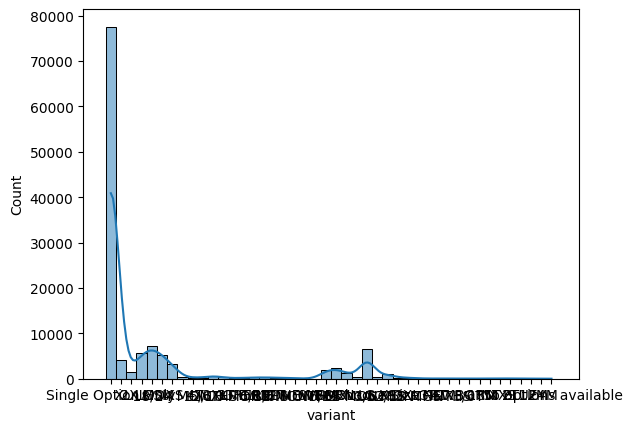

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


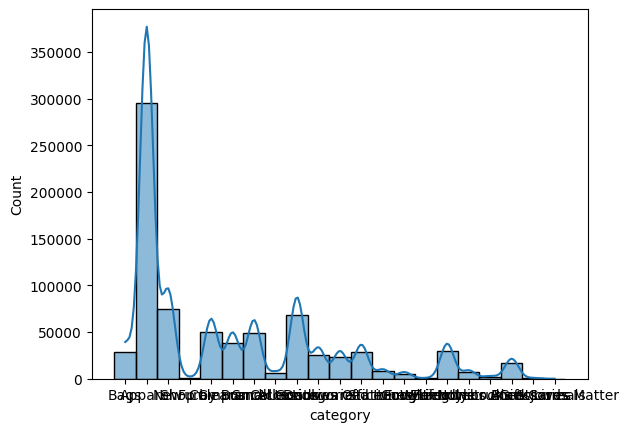

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


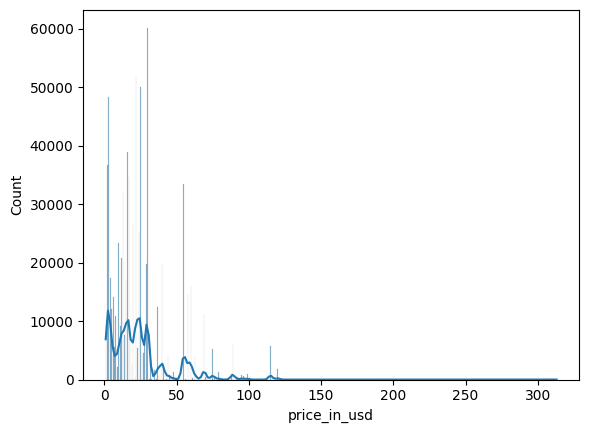

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


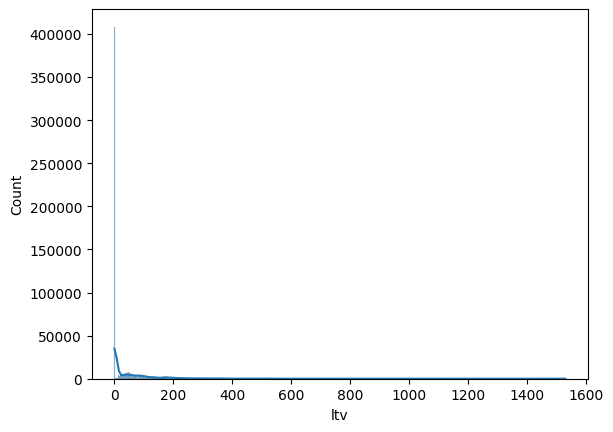

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


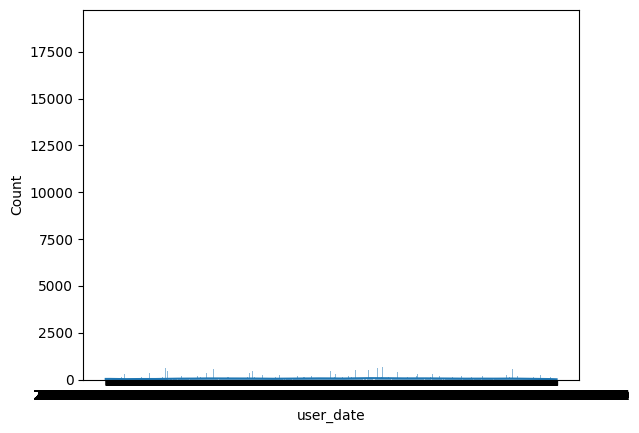

In [36]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()